# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_5160/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

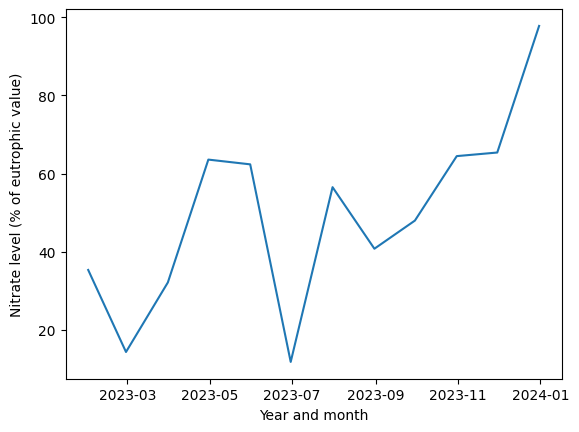

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_5160/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

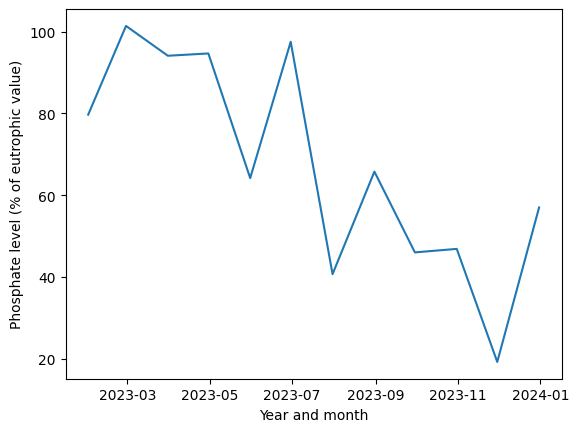

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

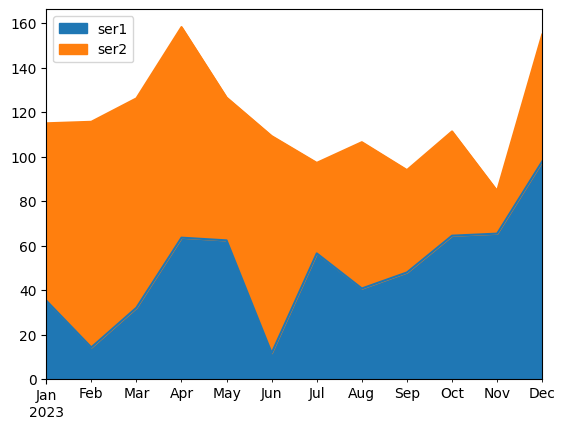

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

This area plot displays a clear ratio between the nitrate and phosphate levels over time; by looking at the graph, it becomes obvious how the levels compare to each other each month (and over the year) and can allow for easier analysis/trend identification. I would ensure this graph has a title, lables for the x and y axis, and an updated legend to ensure there is more context and clarity for analysis. Although the area plot is a better visualization tool than the line graphs, there are some cons to using it. Because the graphs are stacked, sometimes the finer details are hard to spot. We can see the overall general trend with the area plot, but getting an exact numeric difference between the two levels is harder. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [6]:
import pandas as pd
df = pd.read_csv('video_review.csv')

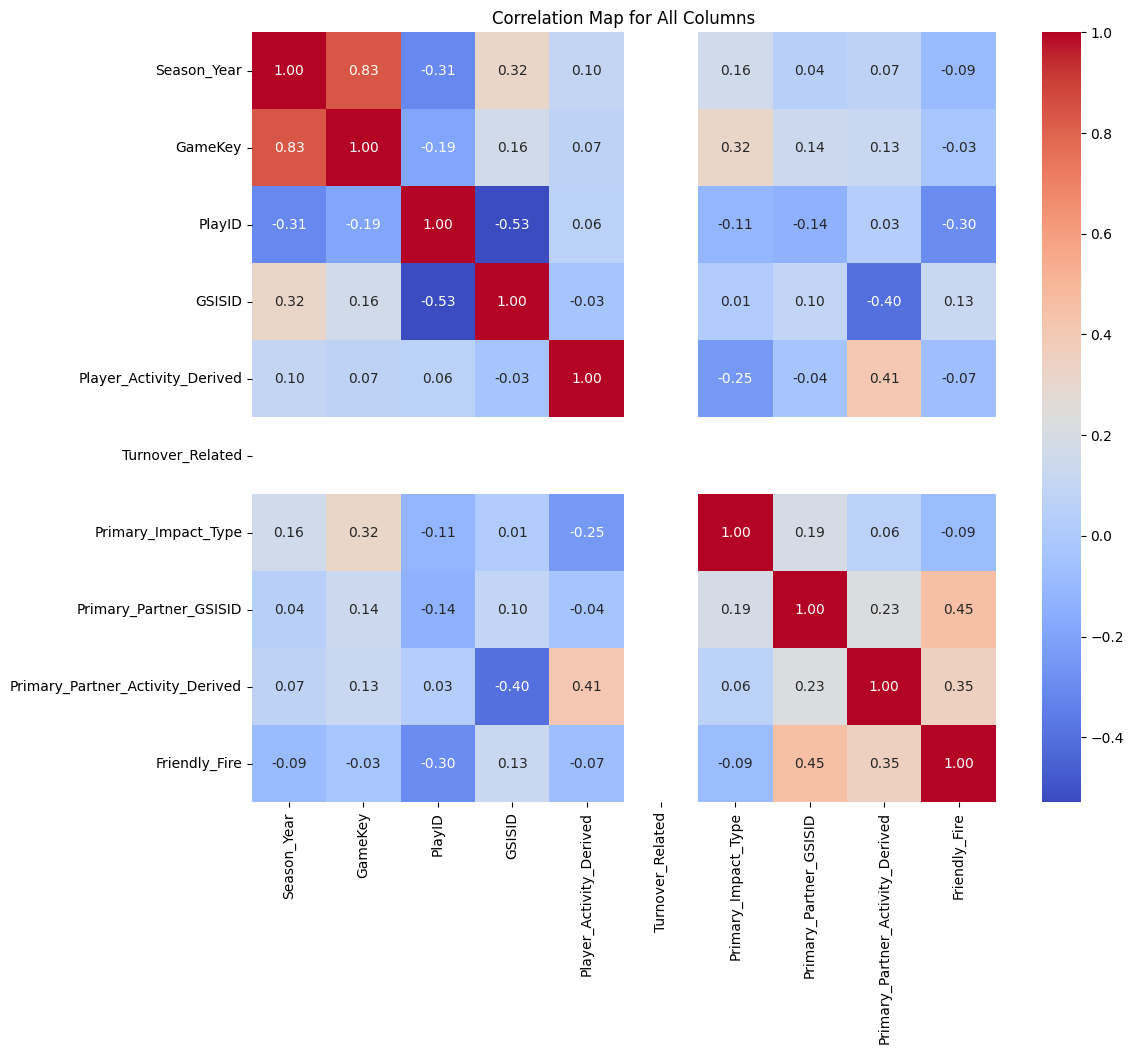

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

exclude_columns = ['GSISID']  

df_encoded = df.copy()

for column in df_encoded.columns:
    if column not in exclude_columns and df_encoded[column].dtype == 'object':
        df_encoded[column] = df_encoded[column].astype('category').cat.codes

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Map for All Columns')
plt.show()



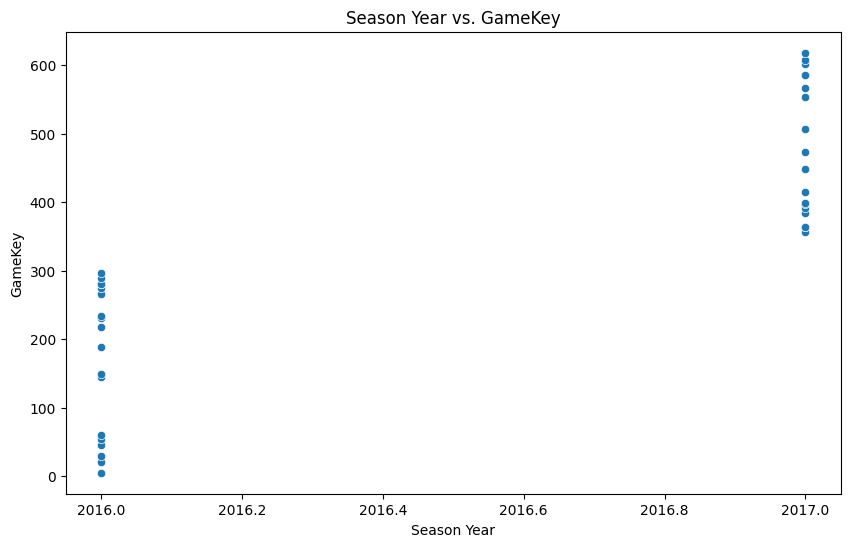

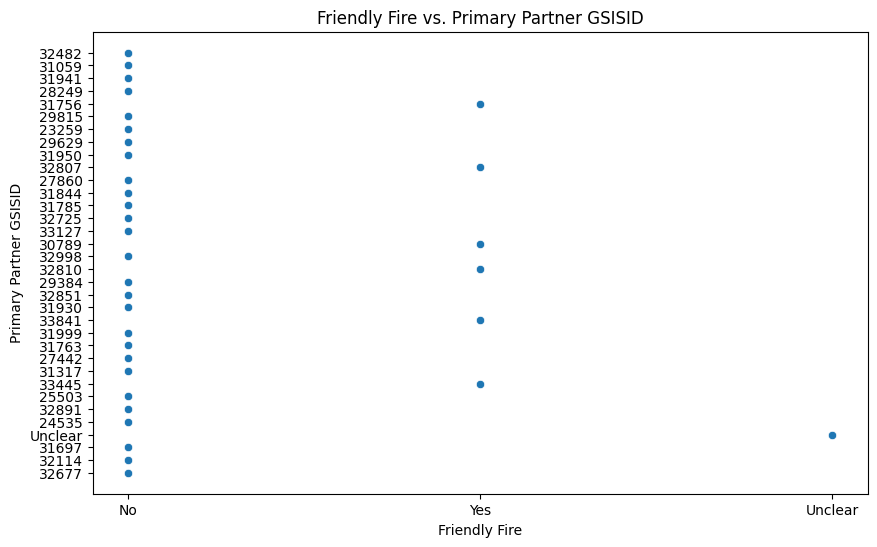

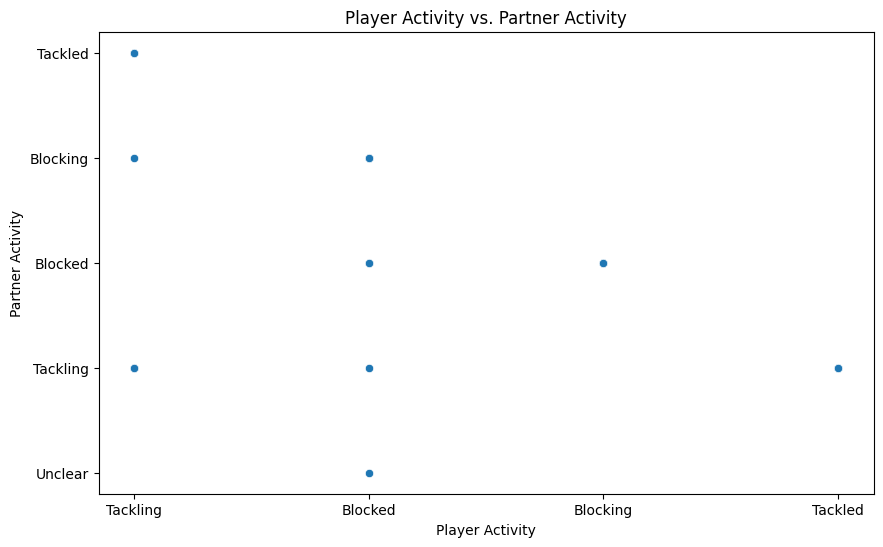

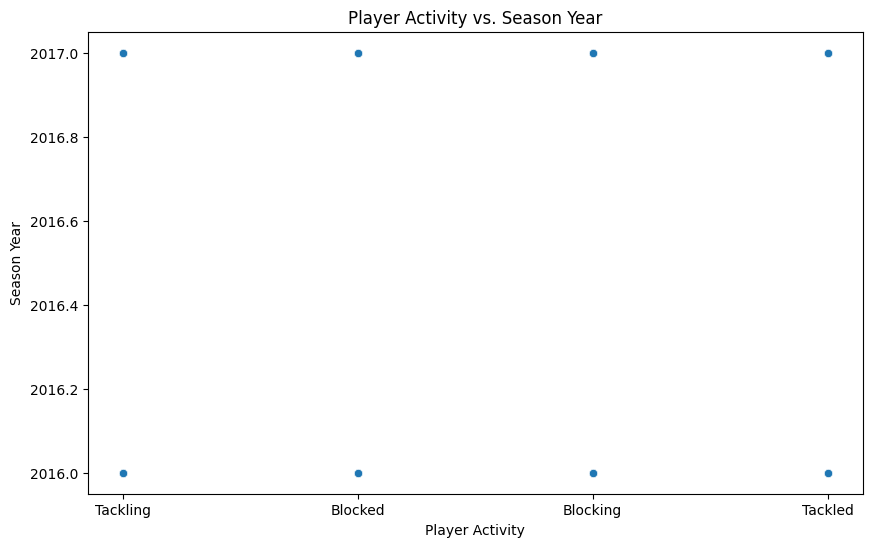

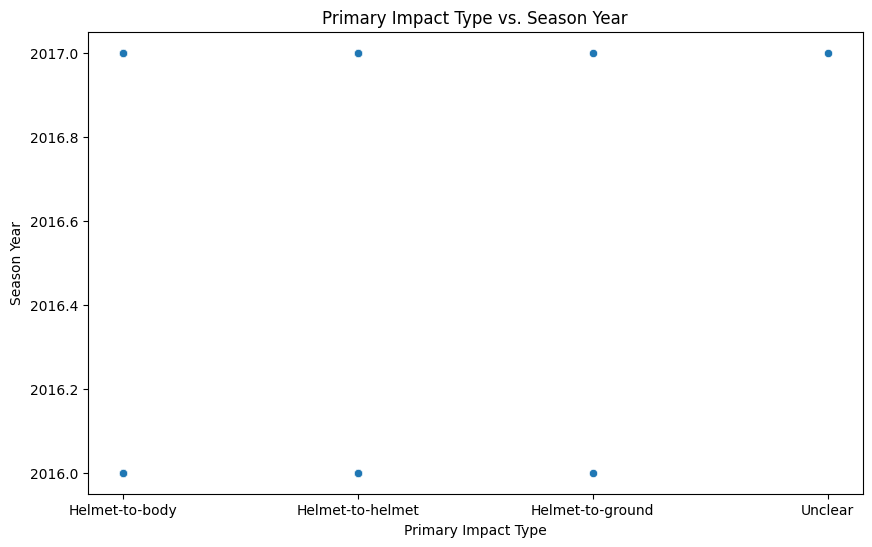

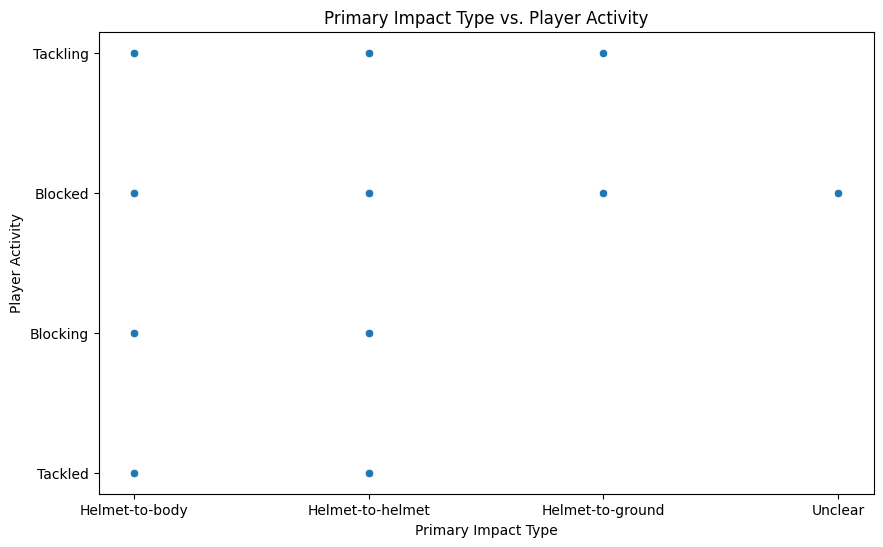

In [8]:
#Draw scatterplots, especially when the correlation is large

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Season Year vs. GameKey
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Season_Year', y='GameKey', data=df)
plt.title('Season Year vs. GameKey')
plt.xlabel('Season Year')
plt.ylabel('GameKey')
plt.show()

# Friendly Fire vs. Primary Partner GSISID
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Friendly_Fire', y='Primary_Partner_GSISID', data=df)
plt.title('Friendly Fire vs. Primary Partner GSISID')
plt.xlabel('Friendly Fire')
plt.ylabel('Primary Partner GSISID')
plt.show()

# Player Activity vs. Partner Activity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player_Activity_Derived', y='Primary_Partner_Activity_Derived', data=df)
plt.title('Player Activity vs. Partner Activity')
plt.xlabel('Player Activity')
plt.ylabel('Partner Activity')
plt.show()

# Player Activity vs. Season Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Player_Activity_Derived', y='Season_Year', data=df)
plt.title('Player Activity vs. Season Year')
plt.xlabel('Player Activity')
plt.ylabel('Season Year')
plt.show()

# Primary Impact Type vs. Season Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary_Impact_Type', y='Season_Year', data=df)
plt.title('Primary Impact Type vs. Season Year')
plt.xlabel('Primary Impact Type')
plt.ylabel('Season Year')
plt.show()

#  Primary Impact Type vs. Player Activity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary_Impact_Type', y='Player_Activity_Derived', data=df)
plt.title('Primary Impact Type vs. Player Activity')
plt.xlabel('Primary Impact Type')
plt.ylabel('Player Activity')
plt.show()


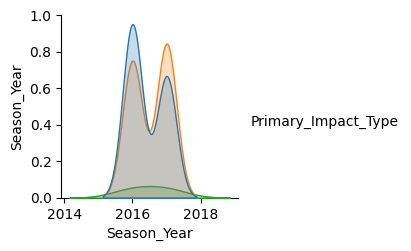

In [9]:
#Draw pairplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['Season_Year', 'Friendly_Fire', 'Player_Activity_Derived', 
                       'Primary_Partner_Activity_Derived', 'Primary_Impact_Type']

sns.pairplot(df[columns_of_interest], hue='Primary_Impact_Type', diag_kind='kde')

plt.show()


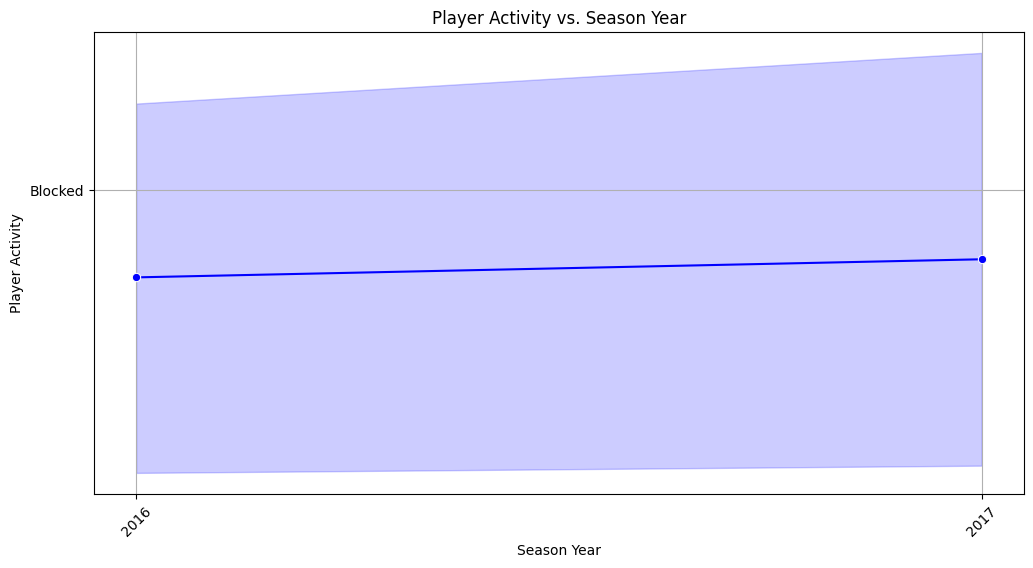

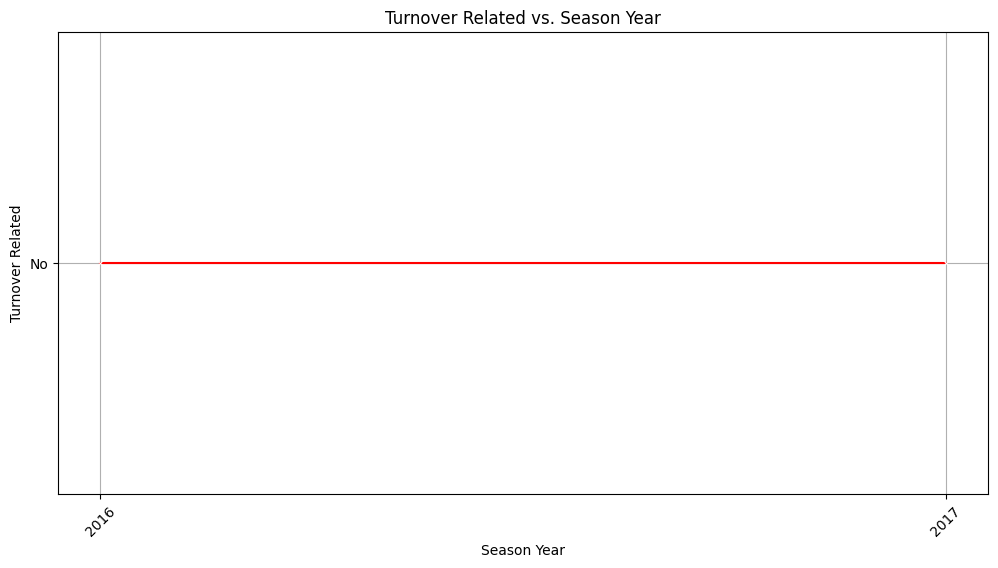

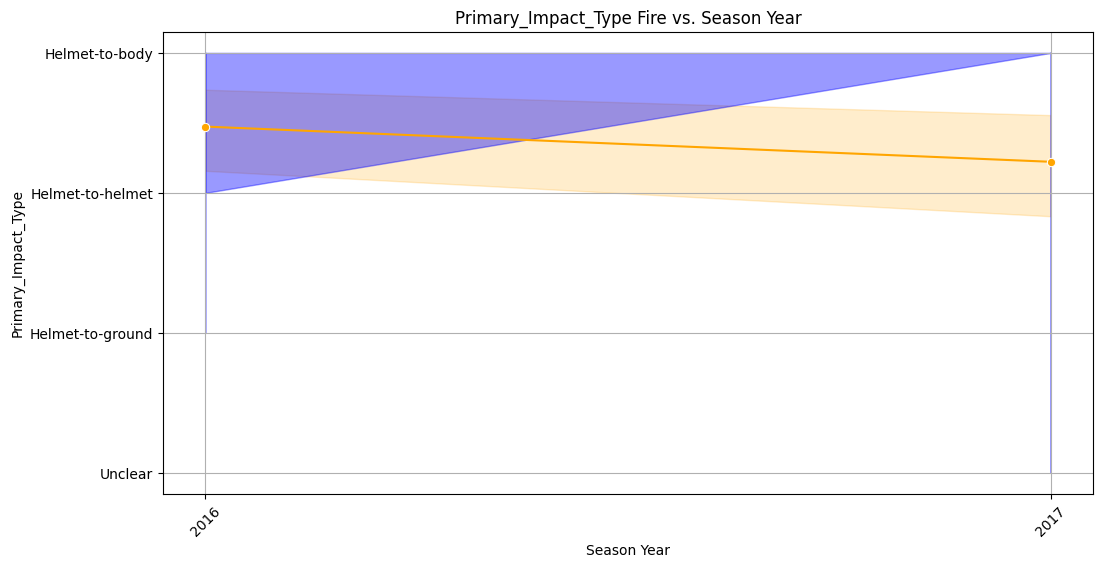

In [10]:
#Draw line graphs and/or area graphs when there is date or time data together with numerical data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Season_Year'] = df['Season_Year'].astype(str)

# Player Activity vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Player_Activity_Derived', marker='o', color='b')
plt.title('Player Activity vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Player Activity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Turnover Related vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Turnover_Related', marker='x', color='r')
plt.title('Turnover Related vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Turnover Related')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impact Type vs. Season Year 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Season_Year', y='Primary_Impact_Type', marker='o', color='orange')
plt.fill_between(df['Season_Year'], df['Primary_Impact_Type'], color='blue', alpha=0.4)  
plt.title('Primary_Impact_Type Fire vs. Season Year')
plt.xlabel('Season Year')
plt.ylabel('Primary_Impact_Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Conclusions:

-Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
The data I analyzed specifically focused on the Video Review database which yields information regarding every punt play that resulted in a concussion in the 2016 to 2017 NFL season. I wanted to see if there was a specific relationship among the data that resulted in a concussion (i.e. was there an impact type that was more frequent, a speficic game where injuries were more frequent, etc.). Based on the initial analysis, the data is what I expected and is usuable for further analysis. A prime example of how I know it is "usuable" is based on the strong correlation of PlayID and GSISID (-0.53). According to Kaggle, the PlayID is a "Numeric play identifier" and GSISID is "Unique player identification". During punt players, usually the personnel on each team is the same (the special teams unit) so it would make sense there is a stronger correlation between these two columns. It will not be 100% correlation as players may vary depending if their team is punting or receiving (or if there are injuries at different parts of the game that impact who is on the field). 


-Do you see any outliers?  (Data points that are far from the rest of the data).
The outliers in this data are not that common, however there is one instance where the data lists the primary impact type as "unclear" and only two instances of "helment to ground" listed as the primary impact type. There are not the norm, as helment-to-helment or helment-to-body are most frequent in the dataset.


-Are any data items highly correlated with each other, suggesting that they are redundant?
Gamekey and Season Year are highly correlated (0.83), which does indicate some redundancy as GameKey is a "Numeric game identifier, unique across seasons"; in other words, the Gamekey is going to be in line with the season year. 


-For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
I think the biggest trend that sticks out is that as time went on, the concussions related to helment-to-helment contact are increasing. Based on the NFL's recent initiatives to limit helment to helment contact by changing kick-offs, increasing penalty yardage and fines, I am not surprised the data resulted in this trend.


-Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
Some potential confounding variables that would add more context to this data would be speed of each player when they were tackled, a player's history of concussions, the field type (turf vs grass), and the weather during the game. All could infulence the result of the play and therefore the player's injury.


In [11]:
import pandas as pd

file_path = 'pffScoutingData.csv'

df_pff = pd.read_csv(file_path)


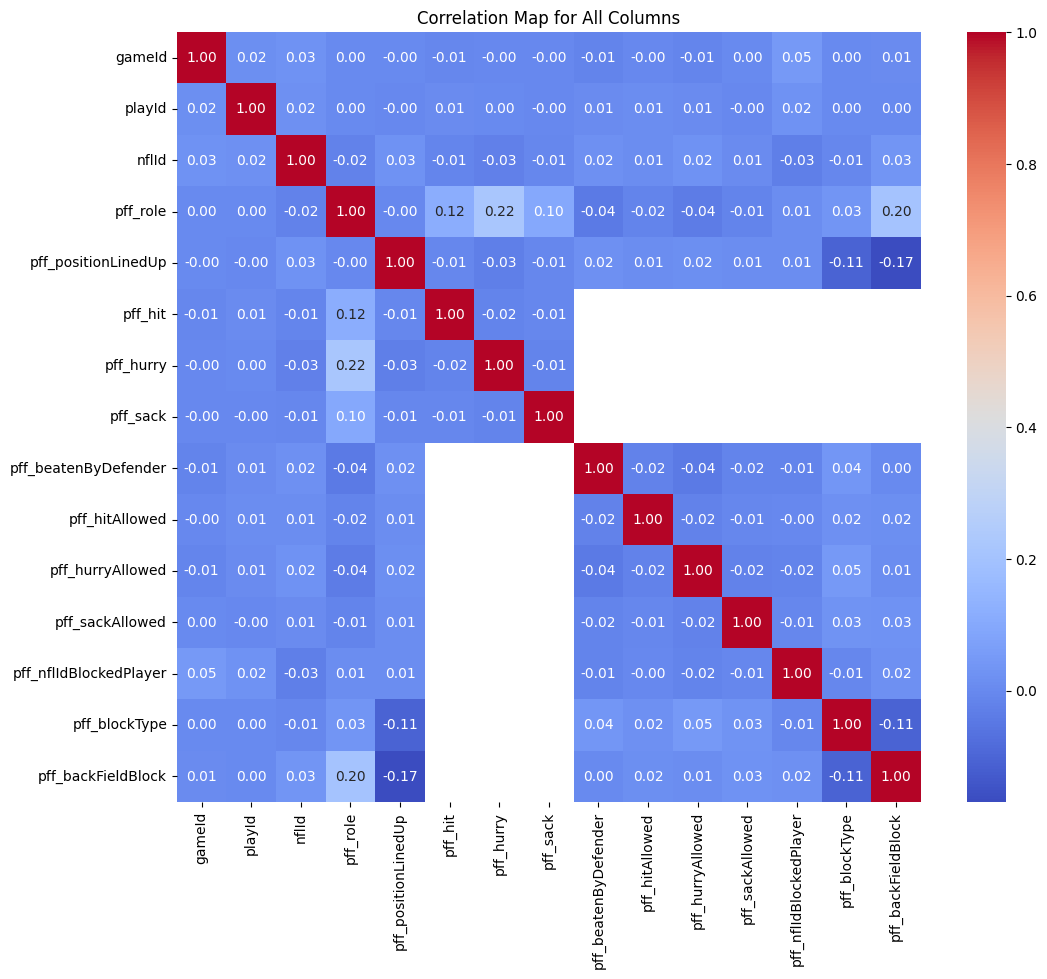

In [12]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded_pff = df_pff.copy()
for column in df_encoded_pff.columns:
    if df_encoded_pff[column].dtype == 'object': 
        df_encoded_pff[column] = df_encoded_pff[column].astype('category').cat.codes

correlation_matrix = df_encoded_pff.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Map for All Columns')
plt.show()



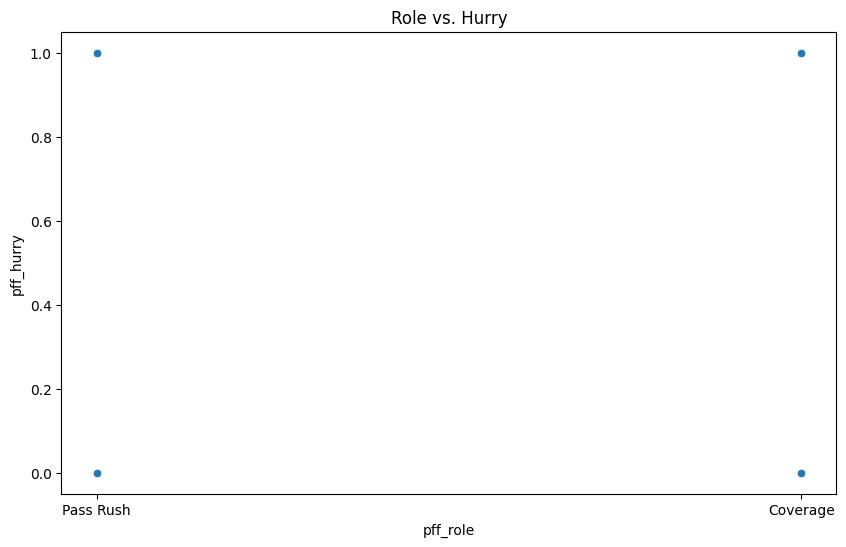

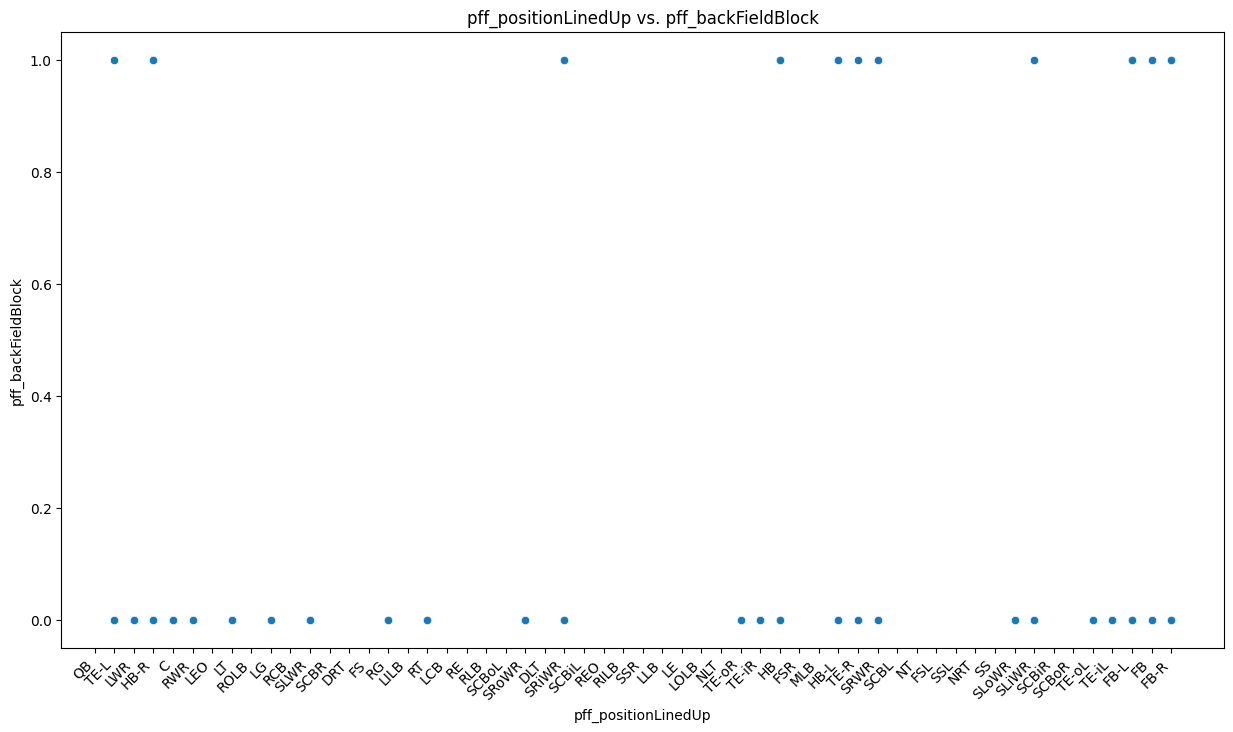

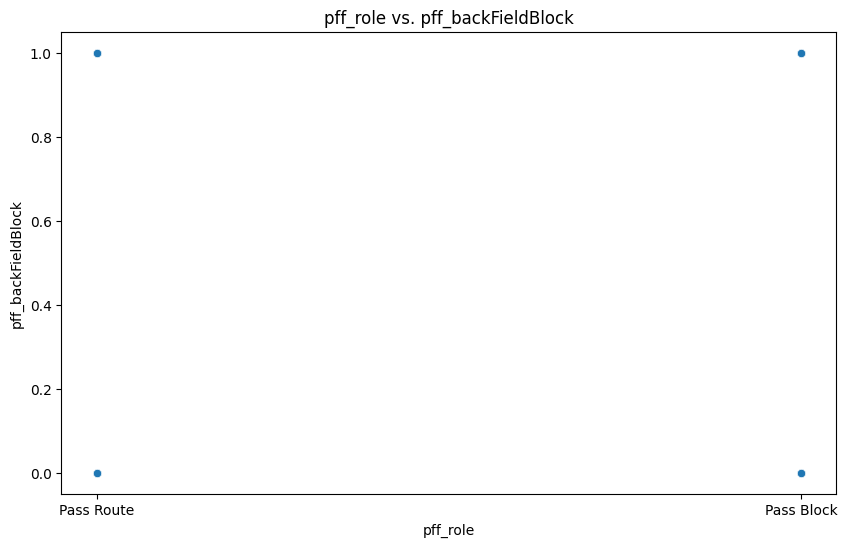

In [13]:
#Draw scatterplots, especially when the correlation is large

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Role vs. Hurry
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pff_role', y='pff_hurry', data=df_pff)
plt.title('Role vs. Hurry')
plt.xlabel('pff_role')
plt.ylabel('pff_hurry')
plt.show()

# Position Lined Up vs. Back field Block
plt.figure(figsize=(15, 8))
sns.scatterplot(x='pff_positionLinedUp', y='pff_backFieldBlock', data=df_pff)
plt.title('pff_positionLinedUp vs. pff_backFieldBlock')
plt.xlabel('pff_positionLinedUp')
plt.ylabel('pff_backFieldBlock')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Role vs. Back field Block
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pff_role', y='pff_backFieldBlock', data=df_pff)
plt.title('pff_role vs. pff_backFieldBlock')
plt.xlabel('pff_role')
plt.ylabel('pff_backFieldBlock')
plt.show()



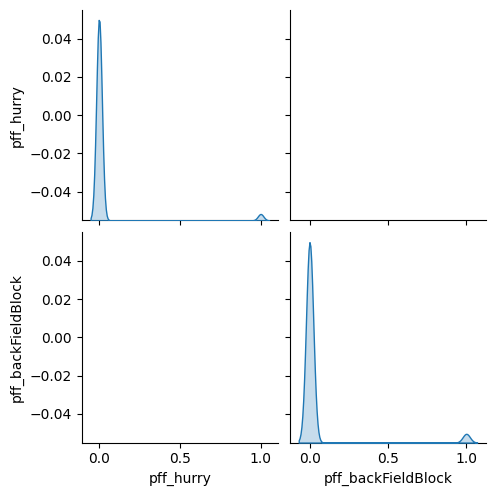

In [14]:
#Draw pairplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['pff_role', 'pff_hurry', 'pff_positionLinedUp', 
                       'pff_backFieldBlock']

sns.pairplot(df_pff[columns_of_interest], diag_kind='kde')

plt.show()


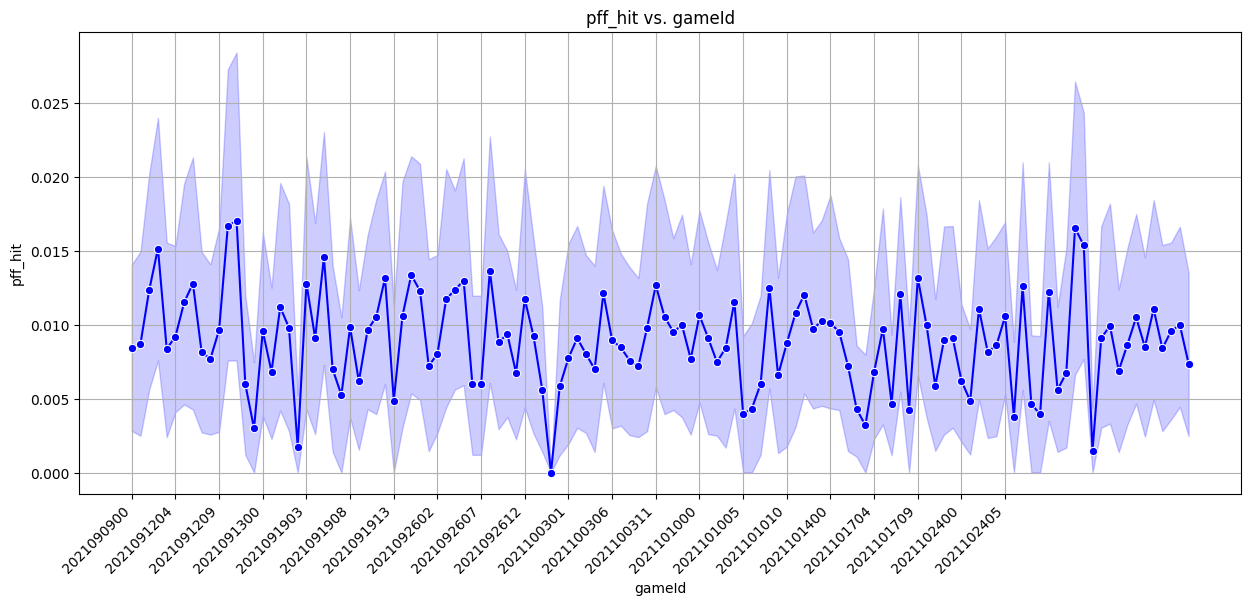

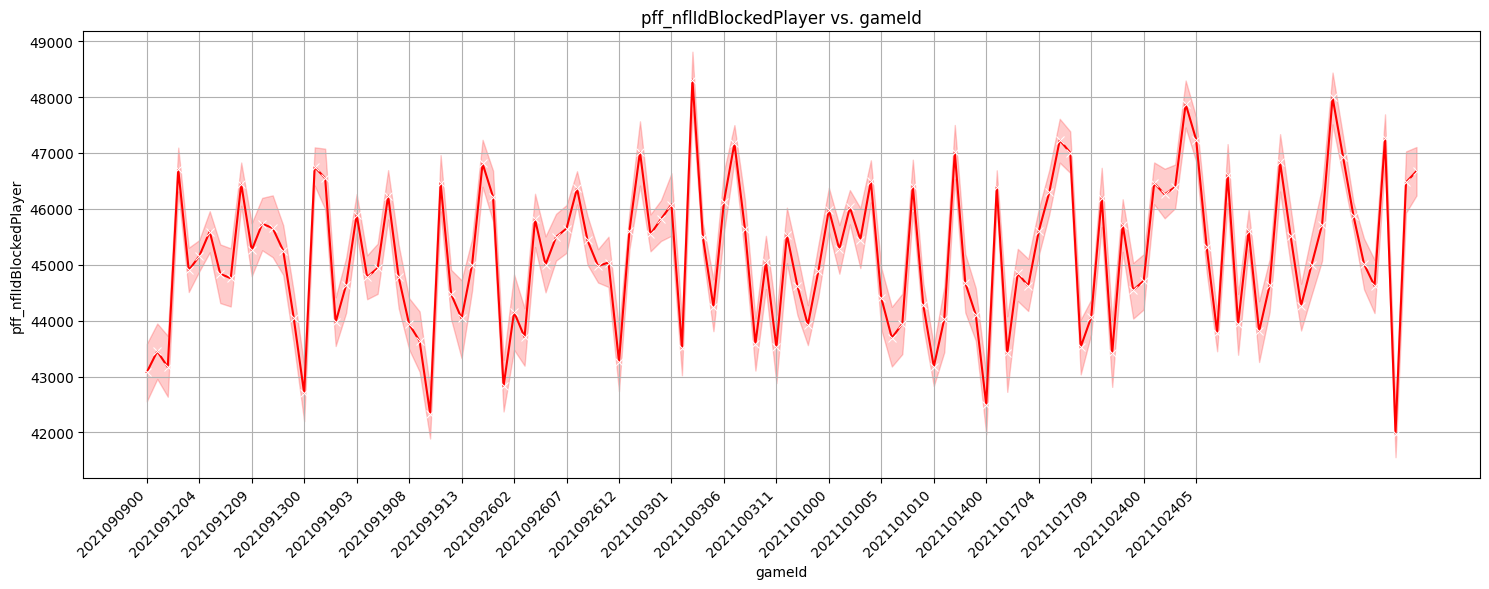

In [15]:
#Draw line graphs and/or area graphs when there is date or time data together with numerical data

## No real date or time available for this dataset, using GameID instead

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_pff['gameId'] = df_pff['gameId'].astype(str)

# pff_hit vs. Game ID
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_pff, x='gameId', y='pff_hit', marker='o', color='b')
plt.title('pff_hit vs. gameId')
plt.xlabel('gameId')
plt.ylabel('pff_hit')
plt.grid(True)
plt.xticks(rotation=45, ha='right') 
plt.xticks(np.arange(0, 101, 5))
plt.show()

# pff_nflIdBlockedPlayer vs. Game ID
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_pff, x='gameId', y='pff_nflIdBlockedPlayer', marker='x', color='r')
plt.title('pff_nflIdBlockedPlayer vs. gameId')
plt.xlabel('gameId')
plt.ylabel('pff_nflIdBlockedPlayer')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.show()



In [16]:
import pandas as pd

file_path = 'InjuryRecord.csv'

df_injury = pd.read_csv(file_path)

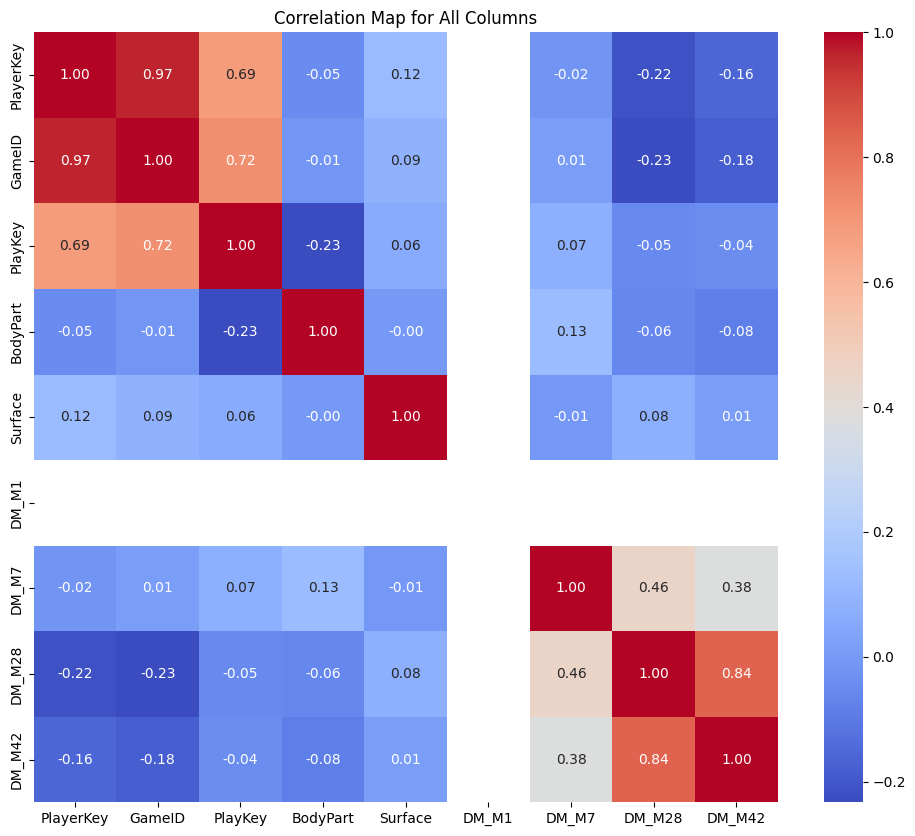

In [17]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded_injury = df_injury.copy()
for column in df_encoded_injury.columns:
    if df_encoded_injury[column].dtype == 'object': 
        df_encoded_injury[column] = df_encoded_injury[column].astype('category').cat.codes

correlation_matrix = df_encoded_injury.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Map for All Columns')
plt.show()

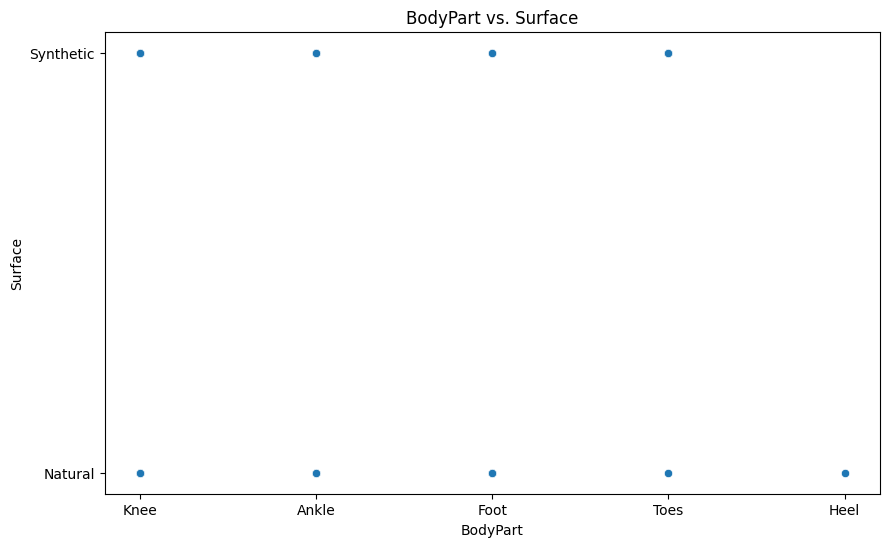

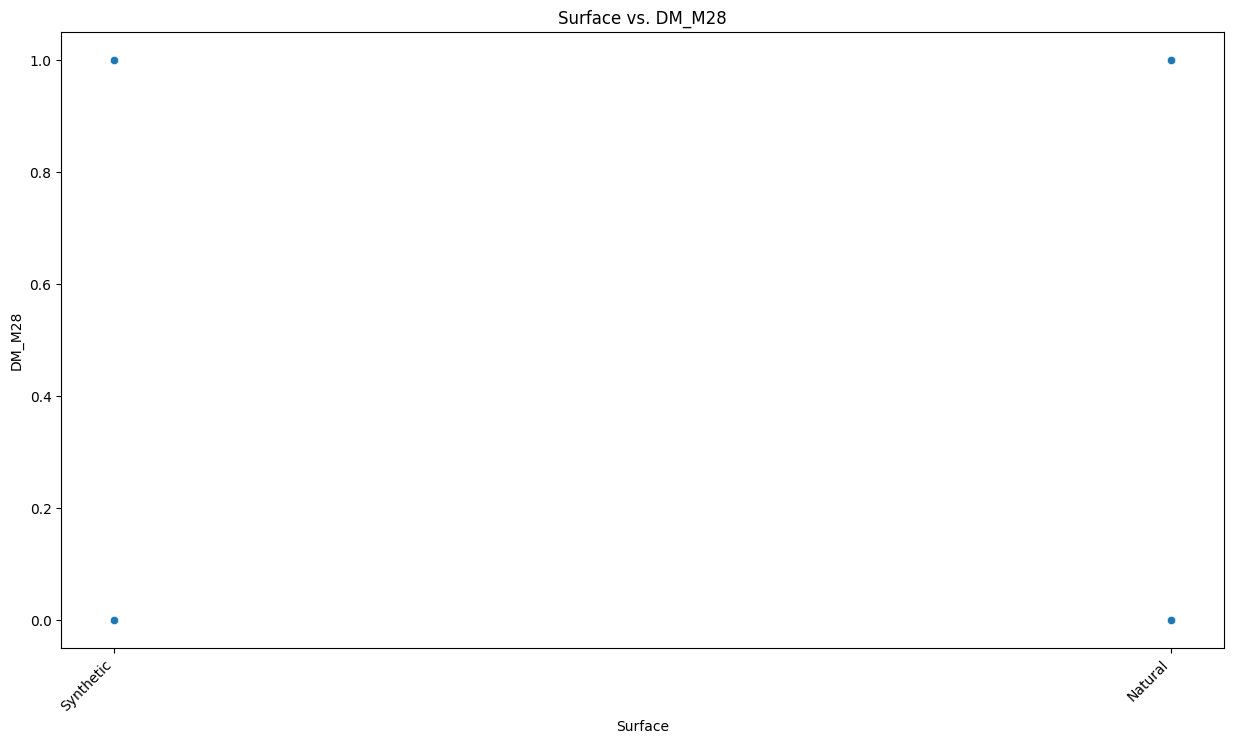

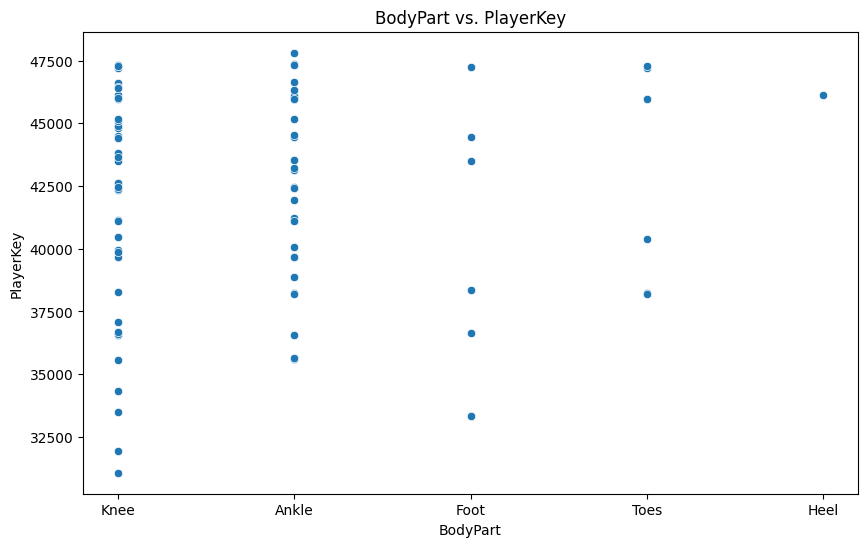

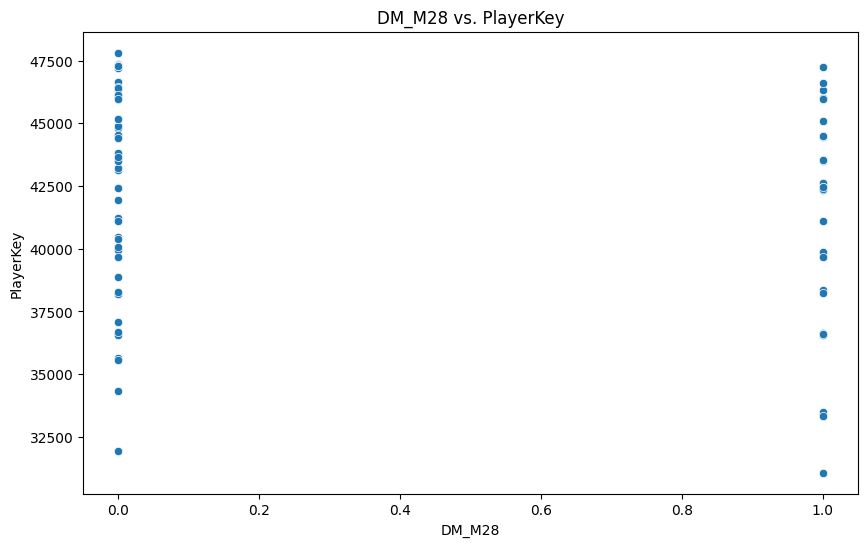

In [20]:
#Draw scatterplots, especially when the correlation is large

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Body Part vs. Surface
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BodyPart', y='Surface', data=df_injury)
plt.title('BodyPart vs. Surface')
plt.xlabel('BodyPart')
plt.ylabel('Surface')
plt.show()

# Surface vs DM_M28
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Surface', y='DM_M28', data=df_injury)
plt.title('Surface vs. DM_M28')
plt.xlabel('Surface')
plt.ylabel('DM_M28')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Body Part vs PlayerKey
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BodyPart', y='PlayerKey', data=df_injury)
plt.title('BodyPart vs. PlayerKey')
plt.xlabel('BodyPart')
plt.ylabel('PlayerKey')
plt.show()

# DM_M28 vs PlayerKey
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DM_M28', y='PlayerKey', data=df_injury)
plt.title('DM_M28 vs. PlayerKey')
plt.xlabel('DM_M28')
plt.ylabel('PlayerKey')
plt.show()

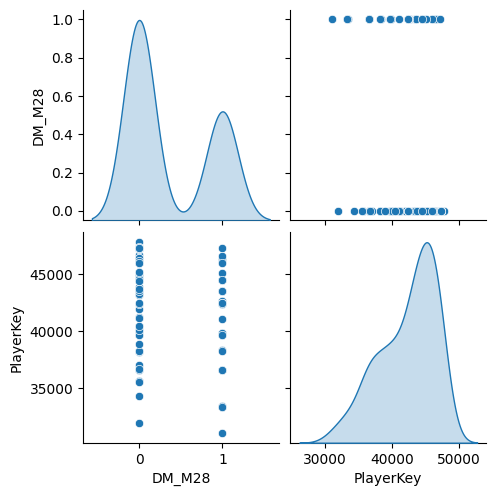

In [21]:
#Draw pairplots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['BodyPart', 'Surface', 'DM_M28', 
                       'PlayerKey']

sns.pairplot(df_injury[columns_of_interest], diag_kind='kde')

plt.show()

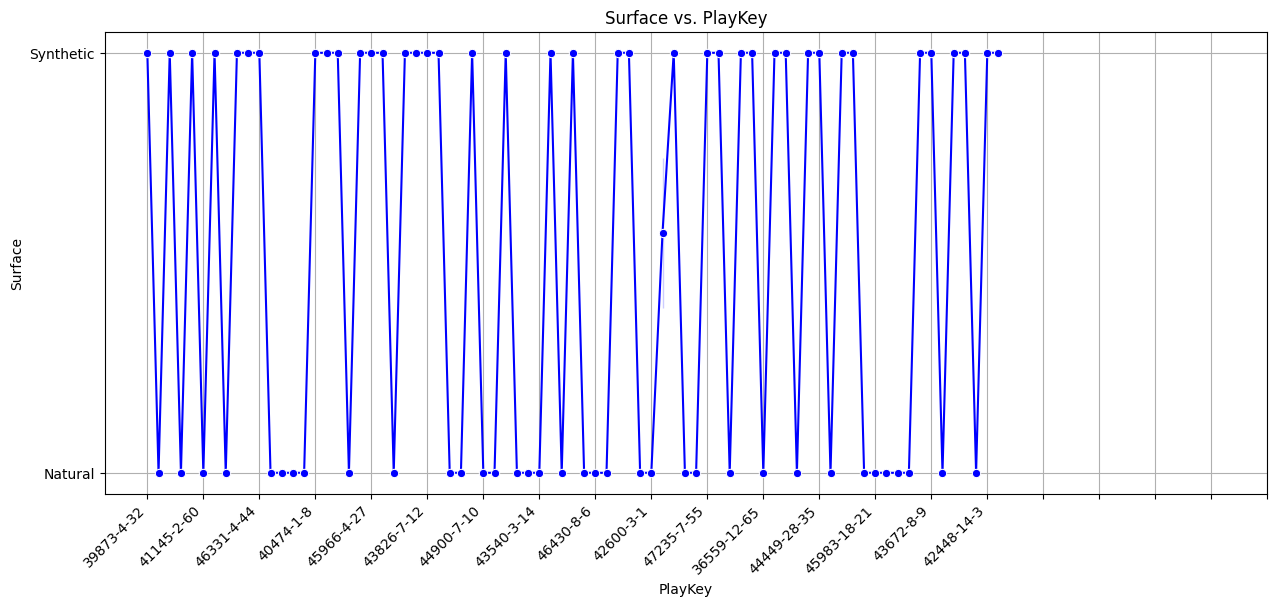

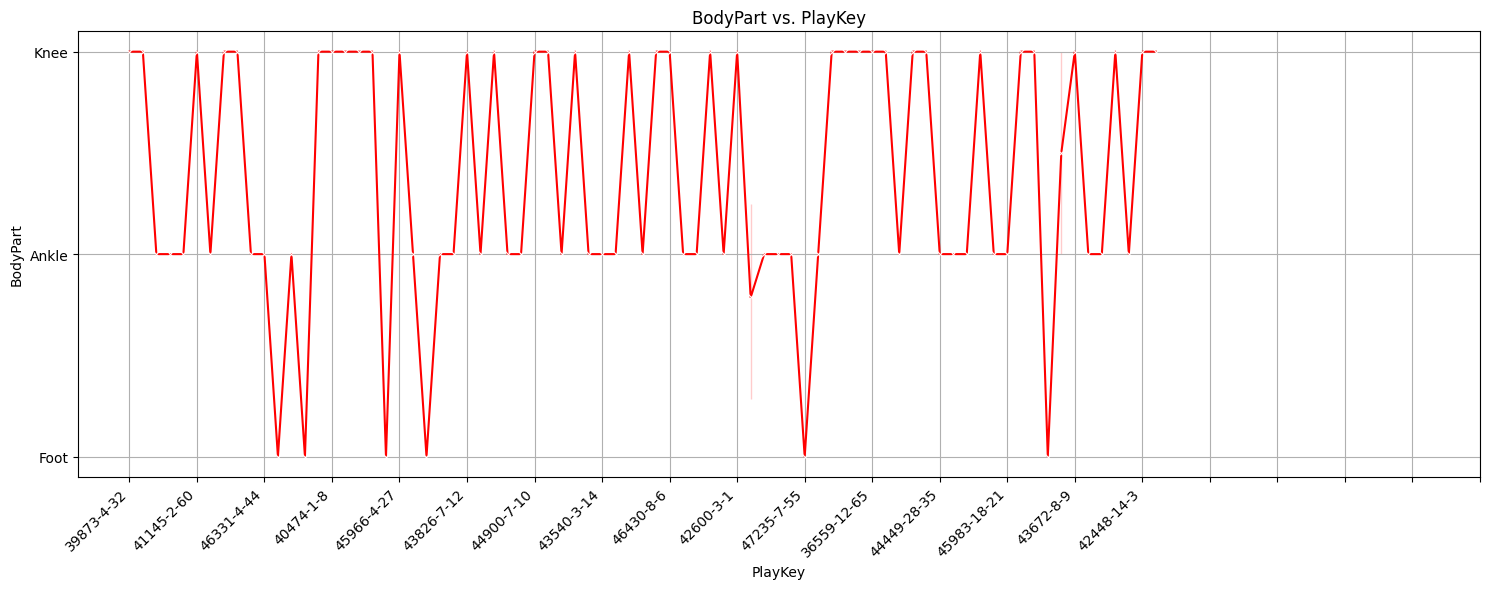

In [23]:
#Draw line graphs and/or area graphs when there is date or time data together with numerical data

## No real date or time available for this dataset, using PlayKey instead

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_injury['PlayKey'] = df_injury['PlayKey'].astype(str)

# Surface vs. PlayKey
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_injury, x='PlayKey', y='Surface', marker='o', color='b')
plt.title('Surface vs. PlayKey')
plt.xlabel('PlayKey')
plt.ylabel('Surface')
plt.grid(True)
plt.xticks(rotation=45, ha='right') 
plt.xticks(np.arange(0, 101, 5))
plt.show()

# Body Part vs. PlayKey
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_injury, x='PlayKey', y='BodyPart', marker='x', color='r')
plt.title('BodyPart vs. PlayKey')
plt.xlabel('PlayKey')
plt.ylabel('BodyPart')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

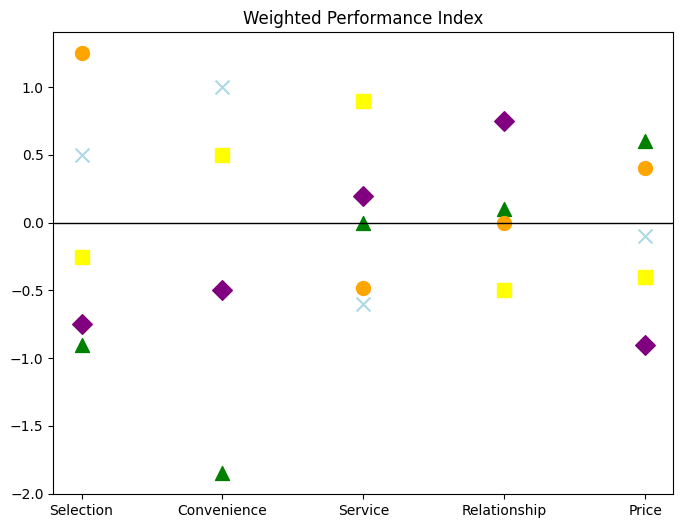

In [19]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Selection', 'Convenience', 'Service', 'Relationship', 'Price']
y_values = [1.5, 1, 0, -0.5, -1.0, -1.5, -0.5]


y_values = {
    'Selection': [1.25, 0.5, -0.25, -0.75, -0.9],
    'Convenience': [1.0, 0.5, -0.5, -0.6 -1.25],
    'Service': [0.9, 0.2, 0, -0.48, -0.6],
    'Relationship': [0.75, 0.1, 0, -0.5, -0.5],
    'Price': [0.6, 0.4, -0.1, -0.4, -0.9]
}

shapes = ['o', 'x', 's', 'D', '^']  
colors = ['orange', 'lightblue', 'yellow', 'purple', 'green']
plt.figure(figsize=(8, 6))

for i, category in enumerate(categories):
    starting_shape = shapes[i % len(shapes)]  
    starting_color = colors[i % len(colors)]   
    
    for j, y in enumerate(y_values[category]):
        shape_index = (j + i) % len(shapes)  
        color_index = (j + i) % len(colors)  
        
        plt.scatter(category, y, color=colors[color_index], marker=shapes[shape_index], s=100)


plt.axhline(0, color='black',linewidth=1)

plt.title("Weighted Performance Index")
plt.grid(False)
plt.show()

